In [2]:
#For data Handling
import pandas as pd
import numpy as np

#For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline


In [4]:
df_genres = pd.read_csv("../Data/genres_v2.csv")
#df_genres.head(10)
df_songs_n= pd.read_csv("../Data/songs_normalize.csv")
#df_songs_n.head(10)

/tmp/ipykernel_20398/1652256070.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_genres = pd.read_csv("../Data/genres_v2.csv")


/home/becode/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/becode/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/becode/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

<AxesSubplot:xlabel='mode', ylabel='Density'>

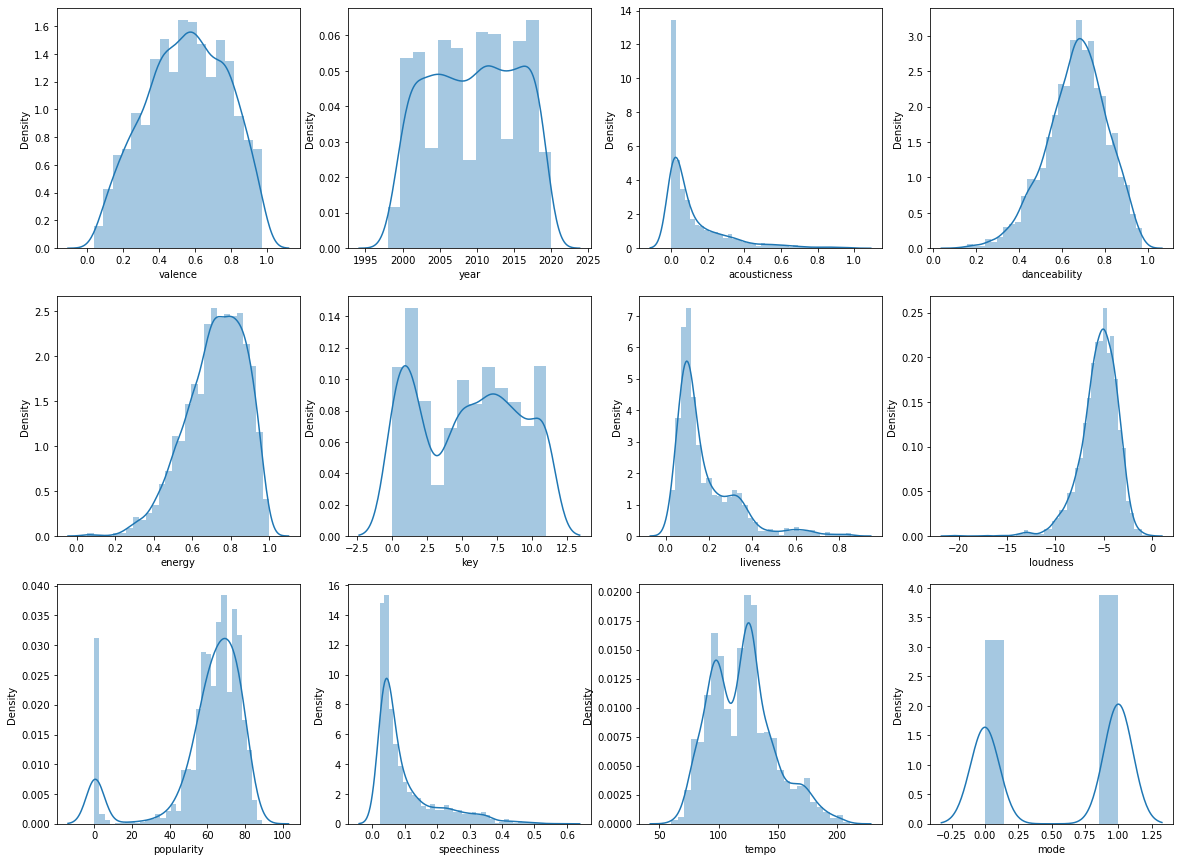

In [5]:
#Visualisation of Variability for each column in the dataframe "df_songs_n"
fig,ax = plt.subplots(3,4,figsize=(20,15))

sns.distplot(df_songs_n['valence'],ax=ax[0,0])
sns.distplot(df_songs_n['year'],ax=ax[0,1])
sns.distplot(df_songs_n['acousticness'],ax=ax[0,2])
sns.distplot(df_songs_n['danceability'],ax=ax[0,3])
#sns.distplot(df['duration_min'],ax=ax[1,1])
sns.distplot(df_songs_n['energy'],ax=ax[1,0])
sns.distplot(df_songs_n['key'],ax=ax[1,1])
sns.distplot(df_songs_n['liveness'],ax=ax[1,2])
sns.distplot(df_songs_n['loudness'],ax=ax[1,3])
sns.distplot(df_songs_n['popularity'],ax=ax[2,0])
sns.distplot(df_songs_n['speechiness'],ax=ax[2,1])
sns.distplot(df_songs_n['tempo'],ax=ax[2,2])
sns.distplot(df_songs_n['mode'],ax=ax[2,3])

<AxesSubplot:>

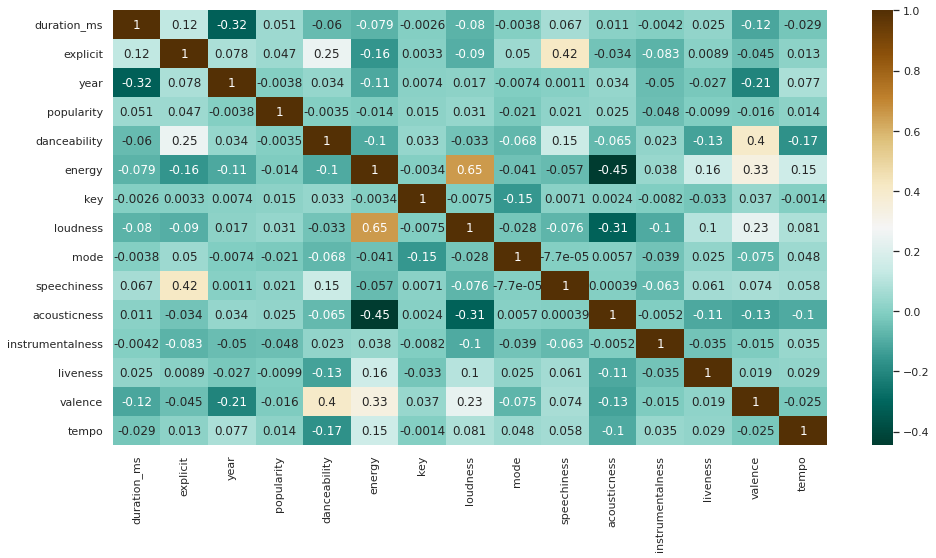

In [6]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = df_songs_n.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r')

As per above correlation graph we can see :

1. Popularity is highly correlated with new relised songs in recent year
2. Energy is also effect on song's popularity.
3. Acousticness seems to be uncorrelated with popularity and also is highly negatively correlated with energy, loudness, and year.
4. Loudness and energy are highly correlated.
5. Valence and dancability are highly coorelated. 


In [ ]:
# How mamy songs per year
songs_per_years = df_songs_n['year'].value_counts().sort_index()
#songs_per_years

In [7]:
from plotly.offline import init_notebook_mode, iplot, plot
songs_per_years = df_songs_n['year'].value_counts().sort_index()

iplot(px.bar(songs_per_years, 
       title='Number of songs per year', 
       text_auto='.2s',
       labels=dict(index='year',value='number of songs'),
       color_discrete_sequence=['#1DB954']
      ).update_xaxes(type='category'))

All the Artist in the list and their total number of songs

In [8]:
artists = df_songs_n['artist'].value_counts()
artists

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: artist, Length: 835, dtype: int64

In [12]:
iplot(px.pie(values=[artists[:100].sum(),2000-artists[:100].sum()], 
       names=['top 100 artists',f'remaining {835-100} artists'], 
       title="How many songs do the top 100 artists have",
       color_discrete_sequence = ['mediumpurple', 'moccasin']
      ).update_traces(textinfo='value+percent'))


In [13]:
# No. of artists with only 1 top hit song VS artists with more than 1
iplot(px.pie(names=['1 song', '>1 songs'], 
       values=[len(artists.loc[lambda x:x==1]), 
          len(artists)-len(artists.loc[lambda x:x==1])
         ],
       title="Artists with 1 top hit VS Artists with >1 top hit",
       color_discrete_sequence=['salmon','lightpink']
      ).update_traces(textinfo='label+percent'))

Top 10 Artists vs the average popularity of their songs

In [25]:
artist_df = df_songs_n[['artist', 'popularity']].groupby('artist').mean().sort_values(by='artist')
artists = artists.sort_index()
artist_df['total songs'] = artists.values
artist_df.sort_values(by='total songs',ascending=False, inplace=True)
artist_df.reset_index(inplace=True)
artist_df[:10]

,artist,popularity,total songs
0,Rihanna,72.120000,25
1,Drake,61.913043,23
2,Eminem,72.333333,21
3,Calvin Harris,67.800000,20
4,Britney Spears,63.052632,19
5,David Guetta,65.833333,18
6,Kanye West,61.705882,17
7,Chris Brown,63.529412,17
8,Taylor Swift,70.312500,16
9,Beyoncé,64.375000,16


In [26]:
iplot(px.scatter(artist_df[:10], 
           x='artist', 
           y='popularity', 
           size='total songs',
           size_max=40,
           color='popularity',
           title='Top 10 artists vs average popularity of their top hits',
           hover_name='total songs'
          ))

In [15]:
#Convert Milli secs duration into minutes
df_songs_n['duration_min'] = df_songs_n['duration_ms']/60000
df_songs_n['duration_min'] = df_songs_n['duration_min'].round(2)
df_genres['duration_min'] = df_genres['duration_ms']/60000
df_genres['duration_min'] = df_genres['duration_min'].round(2)
df_songs_n['duration_min'].head(10)

0    3.52
1    2.78
2    4.18
3    3.74
4    3.34
5    4.23
6    4.74
7    4.31
8    4.52
9    5.12
Name: duration_min, dtype: float64

In [16]:
 #songs duretion
song_duretion_df=df_songs_n[[ 'song','duration_min']]
song_duretion_df.sort_values(by='duration_min',ascending=False, inplace=True)
song_duretion_df.head(5)



/tmp/ipykernel_20398/2060637635.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,song,duration_min
1381,Mirrors,8.07
140,Another Chance,7.55
706,What Goes Around.../...Comes Around (Interlude),7.48
760,LoveStoned / I Think She Knows (Interlude),7.41
242,Days Go By,7.20


In [17]:
song_duretion_df.tail(4)

,song,duration_min
1853,changes,2.03
1752,Jocelyn Flores,1.99
1939,Panini,1.91
1931,Old Town Road,1.88


From the above result we can see:

The longest song is Song:Mirror, it takes time 8.07 minutes
The shortest song is Song:Old Town Road, it takes time 1.88 minutes

In [18]:
# Calculate how many songs are Explicit

explicit_df=df_songs_n['explicit'].value_counts().reset_index()
explicit_df

,index,explicit
0,False,1449
1,True,551


In [19]:
iplot(px.pie(df_songs_n['explicit'].value_counts().reset_index(), 
       values='explicit', 
       names=['Clean', 'Explicit'],
       title='Explicit or not?',
       color_discrete_sequence = ['cornflowerblue', 'crimson']
      ).update_traces(textinfo='label+percent'))

In [20]:
year_explicit =df_songs_n.groupby(['year','explicit']).size().unstack(fill_value=0).reset_index()
year_explicit.rename(columns={False:'Clean', True: 'Explicit'}, inplace=True)

iplot(px.bar(year_explicit, 
       y=['Clean', 'Explicit'], 
       x='year',
       title='Explicit vs Clean distribution each year',
       color_discrete_sequence=['cornflowerblue', 'crimson']
      ).update_xaxes(type='category'))

Key and Mode

In [21]:
iplot(px.pie(df_songs_n['key'].value_counts().reset_index(), 
       names=r'C C♯/D♭ D E♭/D♯ E F F♯/G♭ G A♭/G♯ A B♭/A♯ B'.split(), 
       values='key',
       color_discrete_sequence = px.colors.qualitative.Set3,
       title='Key Distribution'
      ).update_traces(textinfo='label+percent'))

Genre

In [22]:
df_songs_n.genre

0                    pop
1              rock, pop
2           pop, country
3            rock, metal
4                    pop
              ...       
1995                 pop
1996                 pop
1997    hip hop, country
1998                 pop
1999             hip hop
Name: genre, Length: 2000, dtype: object

In [23]:
def split_genres(genre):
    g = genre.replace(' ','').split(',')
    g = [t for t in g if t!='set()']
    return g

def flatten(t):
    return [item for sublist in t for item in sublist]

def remove_duplicates(l):
    res = []
    l = [res.append(x) for x in l if x not in res]
    return res

all_genres = remove_duplicates(flatten(list(df_songs_n['genre'].apply(split_genres))))

genre_count = {genre: 0 for genre in all_genres}

for song in list(df_songs_n['genre']):
    for genre in split_genres(song):
        genre_count[genre]+=1

In [24]:
iplot(px.pie(names=genre_count.keys(), 
       values=[genre_count[key] for key in genre_count.keys()],
       title="Genre Distribution"
      ).update_traces(textinfo='label+percent'))